## Analise da real_data das amostras:
* **Pontos** para analíse:

    Controlo são padrões de fenois ou polifenois e devem servir para ao comparar comos picos da amostra perceber quais deles são (poli)fenois ; 

    O Blank serve para provar quais os picos não são do solvente mas sim dos compostos em analíse;



In [49]:
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import pandas as pd


[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

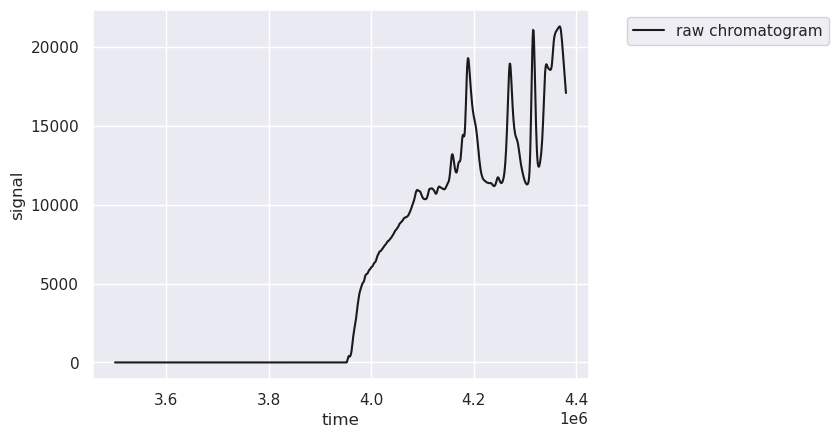

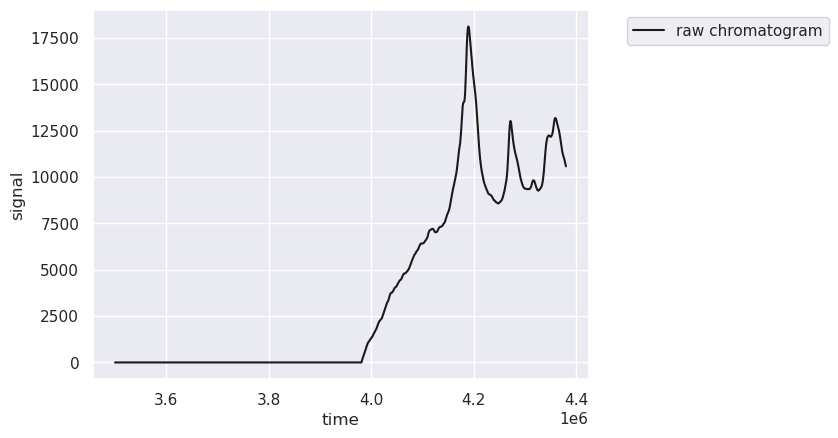

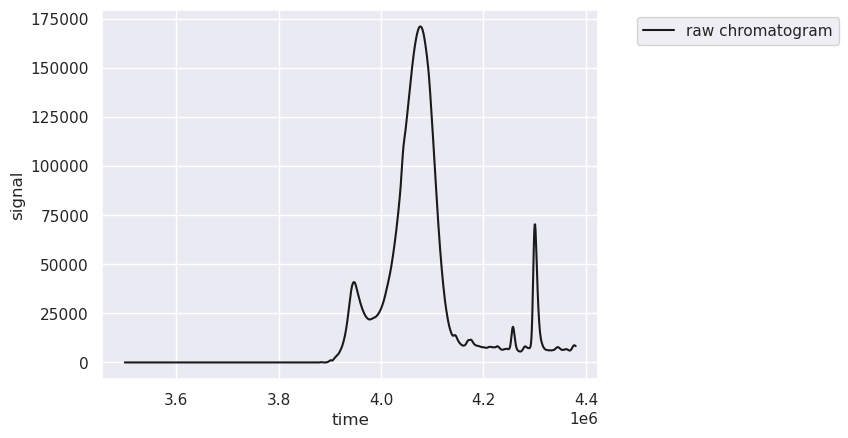

In [41]:
control1 = load_chromatogram('Data_PolyFoxScreen_CSV/Control/C_1_160424.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
control_chromatogram1 = Chromatogram(control1, cols={'time': 'time', 'signal': 'signal'})
control_chromatogram1.crop([3.5e6,5e6])
control_chromatogram1.show()

control2 = load_chromatogram('Data_PolyFoxScreen_CSV/Control/C_2_160424.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
control_chromatogram2 = Chromatogram(control2, cols={'time': 'time', 'signal': 'signal'})
control_chromatogram2.crop([3.5e6,5e6])
control_chromatogram2.show()

blank = load_chromatogram('Data_PolyFoxScreen_CSV/Control/Blank_20092023.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
blank_chromatogram = Chromatogram(blank, cols={'time': 'time', 'signal': 'signal'})
blank_chromatogram.crop([3.5e6,5e6])
blank_chromatogram.show()


Control 1 peaks:


Deconvolving mixture:   0%|          | 0/6 [00:00<?, ?it/s]

Deconvolving mixture: 100%|██████████| 6/6 [00:00<00:00, 22.94it/s]


   retention_time        scale          skew     amplitude          area  \
0     4089599.671  1279.577097  16106.353616  1.008049e+06   1574.086423   
0     4125554.913    62.183025   1278.456086  1.084973e+06  10703.499280   
0     4158394.424   508.727305    298.952982  1.313247e+06   2660.563184   
0     4188799.684    80.381455   2820.605086  1.922319e+06  19081.229701   
0     4247199.677    87.020606   1530.618601  1.162750e+06  10661.080875   
0     4270356.098    33.322567   2236.266540  1.884529e+06  18945.000000   
0     4326332.671    79.789950    371.693610  1.773288e+06  12420.926943   
0     4341233.016  2022.382733   -315.453323  1.545335e+06   1906.342637   
0     4354400.329  1890.508147 -25674.773889  1.875773e+06   2740.225560   

   signal_maximum  peak_id  
0      628.561417        1  
0    10703.499280        2  
0     2058.482915        3  
0    19081.229701        4  
0    10661.080875        5  
0    18945.000000        6  
0    12420.926943        7  
0      

Deconvolving mixture: 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


   retention_time        scale         skew     amplitude          area  \
0     4117602.242   422.483769  -676.065512  4.723166e+05  1.039533e+03   
0     4189552.290    53.390902  4401.232868  1.808207e+06  1.812700e+04   
0     4272011.950    38.134793  7793.408650  1.220888e+06  4.759913e-89   
0     4316802.239   392.611319  -634.931623  9.231360e+05  2.108786e+03   
0     4357620.235  5047.506484  -685.662931  9.459699e+05  1.253007e+03   

   signal_maximum  peak_id  
0    8.918349e+02        1  
0    1.812700e+04        2  
0    4.759913e-89        3  
0    1.875737e+03        4  
0    1.490858e+02        5  
Blank peaks:


Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00, 42.26it/s]

   retention_time        scale          skew     amplitude          area  \
0     3947190.399    77.891369   5941.773443  4.046246e+06  41134.238744   
0     4076800.065   193.562080 -15721.427464  1.701805e+07  70163.968727   
0     4174822.445  1308.485500  -4473.779131  1.018734e+06   1255.709123   
0     4257572.928    73.368958    180.677611  1.789379e+06  18178.858038   
0     4354382.370  5981.703082    957.742601  1.769020e+06   2323.472864   

   signal_maximum  peak_id  
0    41134.238744        1  
0    70150.287870        2  
0      589.655362        3  
0    18178.858038        4  
0      235.402331        5  


[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

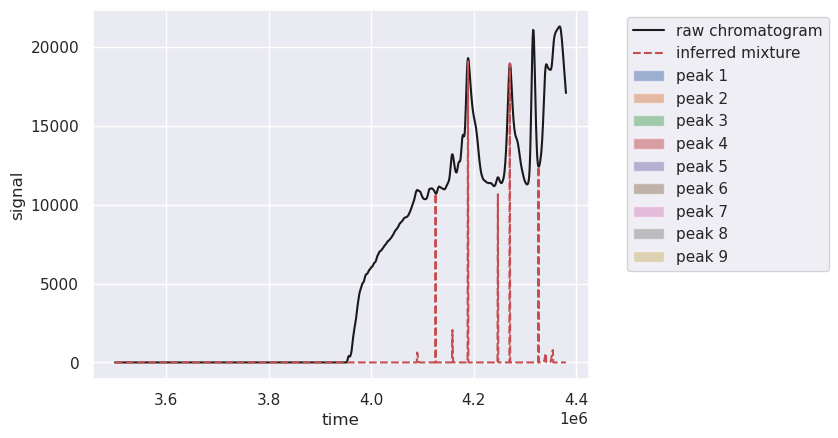

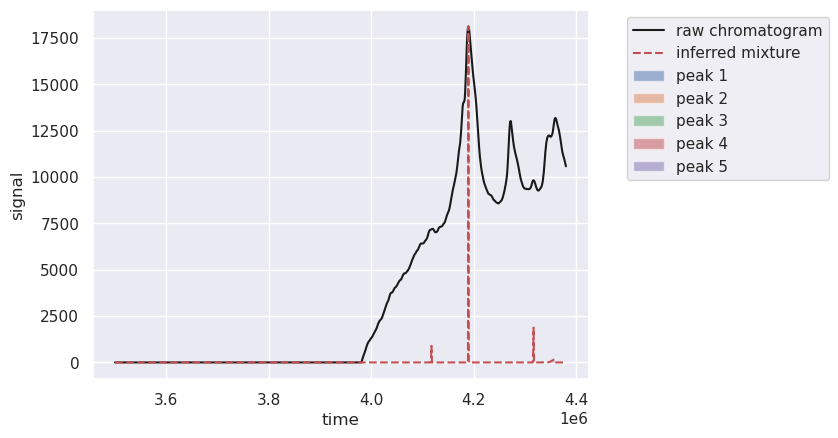

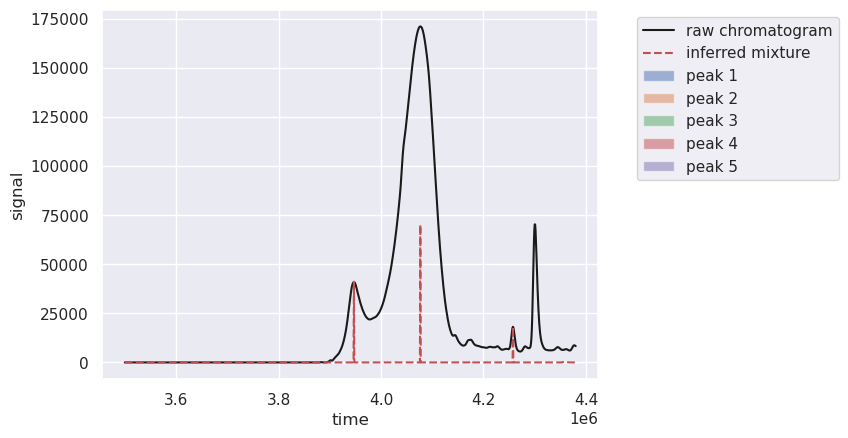

In [43]:
print("Control 1 peaks:")
peaks_control1 = control_chromatogram1.fit_peaks(correct_baseline=False)
print(peaks_control1)
control_chromatogram1.show()


print("Control 2 peaks:")
peaks_control2 = control_chromatogram2.fit_peaks(correct_baseline=False)
print(peaks_control2)
control_chromatogram2.show()


print("Blank peaks:")
peaks_blank = blank_chromatogram.fit_peaks(correct_baseline=False)
print(peaks_blank)
blank_chromatogram.show()



In [66]:
picos_fenol = pd.concat([peaks_control1, peaks_control2], ignore_index=True)
picos_fenol = picos_fenol.sort_values(by='retention_time').reset_index(drop=True)
picos_fenol['fenol'] = range(1, len(picos_fenol) + 1)
print(picos_fenol)

"""
O data frame "picos_fenol" contem todos os 14 picos quantifficados (de fenol) detetados nos cromatogramas de controlo

"""



    retention_time        scale          skew     amplitude          area  \
0      4089599.671  1279.577097  16106.353616  1.008049e+06  1.574086e+03   
1      4117602.242   422.483769   -676.065512  4.723166e+05  1.039533e+03   
2      4125554.913    62.183025   1278.456086  1.084973e+06  1.070350e+04   
3      4158394.424   508.727305    298.952982  1.313247e+06  2.660563e+03   
4      4188799.684    80.381455   2820.605086  1.922319e+06  1.908123e+04   
5      4189552.290    53.390902   4401.232868  1.808207e+06  1.812700e+04   
6      4247199.677    87.020606   1530.618601  1.162750e+06  1.066108e+04   
7      4270356.098    33.322567   2236.266540  1.884529e+06  1.894500e+04   
8      4272011.950    38.134793   7793.408650  1.220888e+06  4.759913e-89   
9      4316802.239   392.611319   -634.931623  9.231360e+05  2.108786e+03   
10     4326332.671    79.789950    371.693610  1.773288e+06  1.242093e+04   
11     4341233.016  2022.382733   -315.453323  1.545335e+06  1.906343e+03   

'\nO data frame "picos_fenol" contem todos os 14 picos quantifficados (de fenol) detetados nos cromatogramas de controlo\n\n'

**Check point** 

**ate agora:**

quantificar os picos nas cromatografias dos grupos controlo e blank

identificar os tipos de fenol nos grupos controlo

dataframe com todos os tipos de fenol (nao sei se esta afirmacao esta quimicamente correta mas acho que os grupos controlo contem os fenois que possivelmente estao presentes nas amostras de pure)


**proximos passos** :

identificar picos de fenol/polifenol

processar dados da apple e da pear

procurar picos de fenol e polifenol nos dados da apple e pear




Deconvolving mixture:   0%|          | 0/2 [00:00<?, ?it/s]

/home/afonso/anaconda3/envs/PolyFoxScreen/lib/python3.12/site-packages/hplc/quant.py:619: UserWarning: 
-------------------------- Hey! Yo! Heads up! ----------------------------------
| This time window (from 3836800 to 4311200) has 13 candidate peaks.
| This is a complex mixture and may take a long time to properly fit depending
| on how well resolved the peaks are. Reduce `buffer` if the peaks in this
| window should be separable by eye. Or maybe just go get something to drink.
--------------------------------------------------------------------------------

  warnings.warn(
Deconvolving mixture: 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]

   retention_time         scale         skew     amplitude          area  \
0     3868698.830    181.841873   589.426681  9.148741e+05   3438.699944   
0     3931210.283  13806.537515   -68.571183  8.693531e+06  10870.697190   
0     3948005.510   1009.218368  -609.597321  1.731521e+07  28393.423501   
0     3981019.679    119.067224  1141.239709  6.548083e+06      0.304765   
0     4009516.346    229.257398   412.685864  2.037400e+06   6638.294481   
0     4040928.898    491.134263   195.976929  1.123169e+06    737.963956   
0     4084534.750    161.215665  -784.199959  9.739935e+05     19.676689   
0     4106135.807   2988.849134   452.672281  1.001353e+06   1297.191377   
0     4147820.233    542.787369  -189.424828  8.273633e+05    673.043021   
0     4183966.840    836.659725    66.670071  5.961144e+05   1005.154405   
0     4197277.060   5224.851371  -248.899551  6.224059e+05    768.843277   
0     4259056.695  58481.582971  8854.818127  5.854036e+06   7065.145340   
0     429663

[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

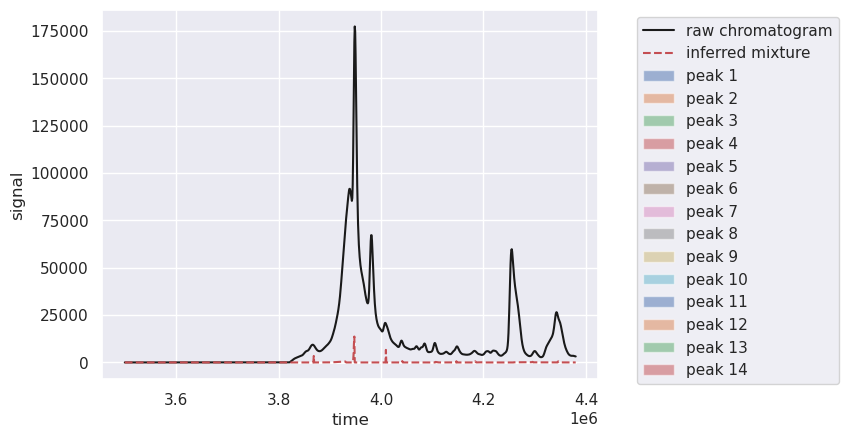

In [68]:
amostra1 = load_chromatogram('Data_PolyFoxScreen_CSV/Apple/RNS01_1.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
cromatograma_amostra1 = Chromatogram(amostra1, cols={'time': 'time', 'signal': 'signal'})
dados_picos_amostra1 = cromatograma_amostra1.fit_peaks(correct_baseline=False)
print(dados_picos_amostra1)
cromatograma_amostra1.show()


In [75]:
rt_picos_amostra1 = dados_picos_amostra1['retention_time']
area_picos_amostra1 = dados_picos_amostra1['area']
picos_fenol_amostra1 = {} 
for index, row in picos_fenol.iterrows():
    rt_referencia = row['retention_time']
    area_referencia = row['area']
    for i, rt in enumerate(rt_picos_amostra1):
        if abs(rt - rt_referencia) < picos_fenol['retention_time'].std() :
            reference_rt_matched = rt_referencia
            picos_fenol_amostra1[i] = row['fenol']

print(picos_fenol_amostra1)
for i,fenol in picos_fenol_amostra1.items():
    print(f"O pico {i+1} presente no cromatograma da amostra 1 corresponde ao tipo de fenol {int(fenol)} com RT {rt_picos_amostra1.iloc[i]} e area {area_picos_amostra1.iloc[i]}")


{4: np.float64(1.0), 5: np.float64(3.0), 6: np.float64(4.0), 7: np.float64(6.0), 8: np.float64(6.0), 9: np.float64(9.0), 10: np.float64(9.0), 11: np.float64(12.0), 12: np.float64(14.0), 13: np.float64(14.0)}
O pico 5 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 1 com RT 4009516.346 e area 6638.294481297569
O pico 6 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 3 com RT 4040928.898 e area 737.9639558962429
O pico 7 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 4 com RT 4084534.75 e area 19.676688871201677
O pico 8 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 6 com RT 4106135.807 e area 1297.1913767015726
O pico 9 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 6 com RT 4147820.233 e area 673.0430214539185
O pico 10 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 9 com RT 4183966.84 e area 1005.1544048902872
O pico 11 presente no cromatograma da amostra 1 correspond